In [1]:
import nltk
import json

In [2]:
from tqdm import tqdm

In [3]:
import time

In [4]:
file_d = []
reviews_sent = []
reviews_neg_sent = []
reviews_pos_sent = []
reviews_str = ""
reviews_pos_str = ""
reviews_neg_str = ""

In [5]:
file = '/Users/gkhanna/Downloads/by_helpful_20.json'

Reading "count" of the file for faster experiments
count = 0 pulls in all data

In [6]:
# Reading count number of JSON lines from the file
count = 0
n = 0
with open(file, "r") as f:
    for line in tqdm(f):
        file_d.append(json.loads(line))
        n =  n + 1
        if count > 0 and n == count:
            break
    


20it [00:00, 7307.15it/s]


In [7]:
# Checking the structures
print(len(file_d))
print(file_d[0])

20
{'asin': 'B000QFDNP8', 'helpful': [472, 547], 'overall': 1, 'reviewText': 'I purchased 6 total mugs for my family. These look great, I don\'t have to worry about spills, and they keep drinks warm (warmer than any other cups based on my experience); okay, so why do they get 1 star and a bad review? Because, the company told me that I should purchase a new lid every 30-60 days! Get this, the lids cost almost as much as the cup!Okay, so here\'s the story: I am an daily tea drinker. I know how to use vinegar to clean mugs if needed, and have kept the lids clean (which requires cleaning them between every single use with soap and water, which I do). So, the point is, I get that I have to keep it clean. However, after a while, the mug start leaking. It was one of my kids mugs, I figured they were just rough with it or something. Then the other lid started having a problem, so I told my kids to use regular glass mugs and sit at the table for now on in order to drink tea.Then my mug started

In [8]:
print(file_d[0]['reviewText'])

I purchased 6 total mugs for my family. These look great, I don't have to worry about spills, and they keep drinks warm (warmer than any other cups based on my experience); okay, so why do they get 1 star and a bad review? Because, the company told me that I should purchase a new lid every 30-60 days! Get this, the lids cost almost as much as the cup!Okay, so here's the story: I am an daily tea drinker. I know how to use vinegar to clean mugs if needed, and have kept the lids clean (which requires cleaning them between every single use with soap and water, which I do). So, the point is, I get that I have to keep it clean. However, after a while, the mug start leaking. It was one of my kids mugs, I figured they were just rough with it or something. Then the other lid started having a problem, so I told my kids to use regular glass mugs and sit at the table for now on in order to drink tea.Then my mug started leaking, and creaking, and not serving its purpose. I used one of the other one

Read in reviews that correspond to the list of ASIN's (Amazon product ID's) selected. 
Choosing the ASIN that has ~ 1000 reviews from the EDA

In [9]:
# ASIN corresponding to the Iron Skillet
#pl = ['B00006JSUA']
# Tumbler
pl = ['B000QFDNP8']

In [10]:
# ASIN's for Iron Skillets from Jey's web scraping
# pl = ['B075MRX5N3', 'B06XT6GZ9V', 'B00006JSUA', 'B00006JSUA', 'B07GKZXS2T', 'B000VTOG78', 'B00X4WQMAS', 'B00G2XGC88', 'B073Q8P6CQ', 'B073Q8DY3F']

In [11]:
# Trying out the ASIN's for toothbrush holder
# pl = ['B078GVMVRH', 'B078GVH2VJ', 'B00SX07354', 'B00CC6XSRC', 'B0777SKKBL', 'B072YVWBXH', 'B01AKGRTUM', 'B07CMHRZRT', 'B07CMHRZS2', 'B073Q58L6Q']

In [12]:
# Getting the reviews out of the dictionary into lists
count = 0
n = 0
for r in tqdm(file_d):
    if r['asin'] in pl:
        reviews_sent.append(r['reviewText'])
        if ((r['overall'] == 1.0) or (r['overall'] == 2.0)):
            reviews_neg_sent.append(r['reviewText'])
        else:
            reviews_pos_sent.append(r['reviewText'])
        n =  n + 1
        if count > 0 and n == count:
            break

100%|██████████| 20/20 [00:00<00:00, 18774.86it/s]


In [13]:

print(len(reviews_sent))
print(reviews_sent[0])

20
I purchased 6 total mugs for my family. These look great, I don't have to worry about spills, and they keep drinks warm (warmer than any other cups based on my experience); okay, so why do they get 1 star and a bad review? Because, the company told me that I should purchase a new lid every 30-60 days! Get this, the lids cost almost as much as the cup!Okay, so here's the story: I am an daily tea drinker. I know how to use vinegar to clean mugs if needed, and have kept the lids clean (which requires cleaning them between every single use with soap and water, which I do). So, the point is, I get that I have to keep it clean. However, after a while, the mug start leaking. It was one of my kids mugs, I figured they were just rough with it or something. Then the other lid started having a problem, so I told my kids to use regular glass mugs and sit at the table for now on in order to drink tea.Then my mug started leaking, and creaking, and not serving its purpose. I used one of the other 

In [14]:
print(len(reviews_pos_sent))
print(reviews_pos_sent[0])

13
&lt;Update - As of 1/2014, Contigo now sell replacement tops for $6 in which the entire mechanism flips up so that you can easier clean them and it includes a button lock and they are designed to fit this mug.>After 6 years, I still use these mugs and their newer 20oz sibliings every single day.  Never had a problem with our dishwasher getting them clean.  Except for a few minor dents, the thermoses that are over 6 years old and SS finish are still like new, tho their lids have been replaced a couple of times now.  Our kids take the Autoseal water bottle lids paired with the Sheffield Stainless Insulated Water Bottles to school every single day (yes the tops gets broken more easily than I'd like but I have yet to find a better overall alternative).It is worth repeating... over 6 years of nearly daily usage I have had to replace the lids only once or twice.  About once every 2 years on average (some more, some less).  $10+$7+$7 = $24 / $6 = $4 per year for a mug that almost never lea

In [15]:
print(len(reviews_neg_sent))
print(reviews_neg_sent[0])

7
I purchased 6 total mugs for my family. These look great, I don't have to worry about spills, and they keep drinks warm (warmer than any other cups based on my experience); okay, so why do they get 1 star and a bad review? Because, the company told me that I should purchase a new lid every 30-60 days! Get this, the lids cost almost as much as the cup!Okay, so here's the story: I am an daily tea drinker. I know how to use vinegar to clean mugs if needed, and have kept the lids clean (which requires cleaning them between every single use with soap and water, which I do). So, the point is, I get that I have to keep it clean. However, after a while, the mug start leaking. It was one of my kids mugs, I figured they were just rough with it or something. Then the other lid started having a problem, so I told my kids to use regular glass mugs and sit at the table for now on in order to drink tea.Then my mug started leaking, and creaking, and not serving its purpose. I used one of the other o

In [16]:
# Had to install space and neuralcoref
import spacy # version 2.1.3
import neuralcoref # version 4.0
from textblob import TextBlob

/Users/gkhanna/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: spacy.tokens.span.Span size changed, may indicate binary incompatibility. Expected 72 from C header, got 80 from PyObject
  return f(*args, **kwds)


In [17]:
nlp = spacy.load('en_core_web_sm')

In [18]:
def extractSubjective(review):
    """
    Input: entire review document (str)
    Output: shortened review document with only subjective sentences
    """
    sent_list = nltk.sent_tokenize(review)
    output = ""  # output string
    for sent in sent_list:
        result = TextBlob(sent)
        if result.sentiment[1] > 0.5:  # keep sentences with sentiment > 0.25
            output += sent+"  "
    return output


# spacy
def replacePronouns(review):
    """
    Input: entire review document (str), multiple sentence_scores
    Output: string, modified review with pronouns replaced.
    """

    # create spacy model
    # nlp = spacy.load('en_core_web_sm')
    # add neuralcoref to spacy model
    neuralcoref.add_to_pipe(nlp, greedyness=0.50, max_dist=75)

    pn = nlp(review)  # pn = pronoun doc
    # print("has coreferences?  {}".format(pn._.has_coref))
    # print("Coreferences:")
    # print(pn._.coref_clusters)

    return pn._.coref_resolved


In [19]:
# Experiments on the reviews
# extractSubjective(reviews_sent[0])

In [20]:
# extractSubjective(reviews_neg_sent[0])

In [21]:
# replacePronouns(reviews_neg_sent[0])

In [22]:
# Getting reviews into strings
reviews_str = "".join(s for s in reviews_sent)


In [23]:
reviews_pos_str = "".join(s for s in reviews_pos_sent)
reviews_neg_str = "".join(s for s in reviews_neg_sent)

In [24]:
print(len(reviews_str))
print(len(reviews_pos_str))
print(len(reviews_neg_str))

25680
17521
8159


In [25]:
print(reviews_str[:100])
print(reviews_pos_str[:100])
print(reviews_neg_str[:100])

I purchased 6 total mugs for my family. These look great, I don't have to worry about spills, and th
&lt;Update - As of 1/2014, Contigo now sell replacement tops for $6 in which the entire mechanism fl
I purchased 6 total mugs for my family. These look great, I don't have to worry about spills, and th


Summarizing before doing anything else with the review strings
We'll skip summarization as there's danger of losing information

In [26]:
from gensim.summarization import summarize

In [27]:
# summarize(reviews_neg_sent[0])

In [28]:
# reviews_str = summarize(reviews_str, ratio=.5)

In [29]:
# print(len(reviews_str))
# print(reviews_str[:100])

In [30]:
# reviews_pos_str = summarize(reviews_pos_str)
# reviews_neg_str = summarize(reviews_neg_str)

In [31]:
print(len(reviews_pos_str))
print(reviews_pos_str[:100])
print(len(reviews_neg_str))
print(reviews_neg_str[:100])

17521
&lt;Update - As of 1/2014, Contigo now sell replacement tops for $6 in which the entire mechanism fl
8159
I purchased 6 total mugs for my family. These look great, I don't have to worry about spills, and th


Separating out sentences into a list
PunktSentenceTokenizer is customized to separate sentences on a few extra words and characters as wel

In [32]:
from nltk.tokenize.punkt import PunktSentenceTokenizer, PunktLanguageVars
'''We customize the ReviewLangVars class to separate sentences based on some additional keywords'''


class ReviewLangVars(PunktLanguageVars):
    sent_end_chars = ('pros:', 'cons:', '[','][','.','?','!')
    
sent_tokenizer1 = PunktSentenceTokenizer(lang_vars = ReviewLangVars())
# sent_tokenizer1 = PunktSentenceTokenizer()
sent_fullreview = sent_tokenizer1.tokenize(reviews_str)
sent_neg_review = sent_tokenizer1.tokenize(reviews_neg_str)
sent_pos_review = sent_tokenizer1.tokenize(reviews_pos_str)

In [33]:
# This are the original sentences tokenized
print(sent_fullreview[0])
print(sent_fullreview[:5])
print(len(sent_fullreview))

I purchased 6 total mugs for my family.
['I purchased 6 total mugs for my family.', "These look great, I don't have to worry about spills, and they keep drinks warm (warmer than any other cups based on my experience); okay, so why do they get 1 star and a bad review?", 'Because, the company told me that I should purchase a new lid every 30-60 days!', "Get this, the lids cost almost as much as the cup!Okay, so here's the story: I am an daily tea drinker.", 'I know how to use vinegar to clean mugs if needed, and have kept the lids clean (which requires cleaning them between every single use with soap and water, which I do).']
202


In [34]:
# This are the negative sentences tokenized
print(sent_neg_review[0])
print(sent_neg_review[:5])
print(len(sent_neg_review))

I purchased 6 total mugs for my family.
['I purchased 6 total mugs for my family.', "These look great, I don't have to worry about spills, and they keep drinks warm (warmer than any other cups based on my experience); okay, so why do they get 1 star and a bad review?", 'Because, the company told me that I should purchase a new lid every 30-60 days!', "Get this, the lids cost almost as much as the cup!Okay, so here's the story: I am an daily tea drinker.", 'I know how to use vinegar to clean mugs if needed, and have kept the lids clean (which requires cleaning them between every single use with soap and water, which I do).']
65


In [35]:
# This are the positive sentences tokenized
print(sent_pos_review[0])
print(sent_pos_review[:5])
print(len(sent_pos_review))

&lt;Update - As of 1/2014, Contigo now sell replacement tops for $6 in which the entire mechanism flips up so that you can easier clean them and it includes a button lock and they are designed to fit this mug.>After 6 years, I still use these mugs and their newer 20oz sibliings every single day.
['&lt;Update - As of 1/2014, Contigo now sell replacement tops for $6 in which the entire mechanism flips up so that you can easier clean them and it includes a button lock and they are designed to fit this mug.>After 6 years, I still use these mugs and their newer 20oz sibliings every single day.', 'Never had a problem with our dishwasher getting them clean.', 'Except for a few minor dents, the thermoses that are over 6 years old and SS finish are still like new, tho their lids have been replaced a couple of times now.', "Our kids take the Autoseal water bottle lids paired with the Sheffield Stainless Insulated Water Bottles to school every single day (yes the tops gets broken more easily than

Extracting common Items using apriori
https://github.com/asaini/Apriori

In [36]:
import sys

from itertools import chain, combinations
from collections import defaultdict
from optparse import OptionParser


def subsets(arr):
    """ Returns non empty subsets of arr"""
    return chain(*[combinations(arr, i + 1) for i, a in enumerate(arr)])


def returnItemsWithMinSupport(itemSet, transactionList, minSupport, freqSet):
        """calculates the support for items in the itemSet and returns a subset
       of the itemSet each of whose elements satisfies the minimum support"""
        _itemSet = set()
        localSet = defaultdict(int)

        for item in itemSet:
                for transaction in transactionList:
                        if item.issubset(transaction):
                                freqSet[item] += 1
                                localSet[item] += 1

        for item, count in localSet.items():
                support = float(count)/len(transactionList)

                if support >= minSupport:
                        _itemSet.add(item)

        return _itemSet


def joinSet(itemSet, length):
        """Join a set with itself and returns the n-element itemsets"""
        return set([i.union(j) for i in itemSet for j in itemSet if len(i.union(j)) == length])


def getItemSetTransactionList(data_iterator):
    transactionList = list()
    itemSet = set()
    for record in data_iterator:
        transaction = frozenset(record)
        transactionList.append(transaction)
        for item in transaction:
            itemSet.add(frozenset([item]))              # Generate 1-itemSets
    return itemSet, transactionList


def runApriori(data_iter, minSupport, minConfidence):
    """
    run the apriori algorithm. data_iter is a record iterator
    Return both:
     - items (tuple, support)
     - rules ((pretuple, posttuple), confidence)
    """
    itemSet, transactionList = getItemSetTransactionList(data_iter)

    freqSet = defaultdict(int)
    largeSet = dict()
    # Global dictionary which stores (key=n-itemSets,value=support)
    # which satisfy minSupport

    assocRules = dict()
    # Dictionary which stores Association Rules

    oneCSet = returnItemsWithMinSupport(itemSet,
                                        transactionList,
                                        minSupport,
                                        freqSet)

    currentLSet = oneCSet
    k = 2
    while(currentLSet != set([])):
        largeSet[k-1] = currentLSet
        currentLSet = joinSet(currentLSet, k)
        currentCSet = returnItemsWithMinSupport(currentLSet,
                                                transactionList,
                                                minSupport,
                                                freqSet)
        currentLSet = currentCSet
        k = k + 1

    def getSupport(item):
            """local function which Returns the support of an item"""
            return float(freqSet[item])/len(transactionList)

    toRetItems = []
    for key, value in tqdm(list(largeSet.items())):
        toRetItems.extend([(tuple(item), getSupport(item))
                           for item in value])

    toRetRules = []
    for key, value in tqdm(list(largeSet.items())[1:]):
        for item in value:
            _subsets = map(frozenset, [x for x in subsets(item)])
            for element in _subsets:
                remain = item.difference(element)
                if len(remain) > 0:
                    confidence = getSupport(item)/getSupport(element)
                    if confidence >= minConfidence:
                        toRetRules.append(((tuple(element), tuple(remain)),
                                           confidence))
    return toRetItems, toRetRules


def printResults(items):
    """prints the generated itemsets sorted by support and the confidence rules sorted by confidence"""
    for item, support in sorted(items, key=lambda item_support: item_support[1], reverse=True):
        print(str(item), support)

In [37]:
# Utility functions
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

lem = nltk.WordNetLemmatizer()
stemmer = nltk.stem.porter.PorterStemmer()
lem_word_mapping = {}

# Find leaves of a tree
def leaves(tree):
    """Finds leaf nodes of a chunk tree."""
    for subtree in tree.subtrees(filter = lambda t: t.label() in ['P1','P2','P3','P4','P5','P6','P7','P8', 'P9', 'P10']):
        yield subtree.leaves()
    
def stem(word):
    """Normalises words to lowercase and stems and lemmatizes it."""
    word = word.lower()
    word = word.replace("'","").replace('"','').replace('.','')
    word1 = stemmer.stem(word)
    return word1

# lowercase, stem and lemmatize
def normalise(word):
    """Normalises words to lowercase and stems and lemmatizes it."""
    word = word.lower()
    word1 = stemmer.stem(word)
    word2 = lem.lemmatize(word1)
    if word != word2:
        lem_word_mapping[word2] = word
    return word2

def acceptableWord(word):
    """Checks conditions for acceptable word: length, stopword."""
    accepted = bool((2 <= len(word) <= 40) and word.lower() not in stopwords)
    return accepted

# extract words after normalizing and checking if acceptable
def getTerms(tree):
    """Returns the words after checking acceptable conditions, normalizing and lemmatizing"""
    term = [ stem(w) for w in tree if acceptableWord(w) ]
    return term
    
def getNorm(tree):
    """Parse leaves in chunk and return after checking acceptable conditions, normalizing and lemmatizing"""
    for leaf in leaves(tree):
        term = [ normalise(w) for w,t in leaf if acceptableWord(w) ]
        yield term

Set of nouns for each sentence

In [38]:
# Set of nouns for the apriori algorithm

def isNoun(n):
    if n=='NN' or n=='NNS' or n=='NNP' or n=='NNPS':
        return True

revset=[]
for line in tqdm(sent_fullreview):
    # print(line)
    a = nltk.word_tokenize(line)
    # print(a)
    nouns = [word for (word, pos) in nltk.pos_tag(a) if isNoun(pos)] 
    # print(nouns)
    terms = getTerms(nouns)
    # print(terms)

    revset.append(terms)



100%|██████████| 202/202 [00:00<00:00, 456.85it/s]


In [39]:
print(revset[0])
print(revset[:10])

['mug', 'famili']
[['mug', 'famili'], ['spill', 'drink', 'cup', 'experi', 'star', 'review'], ['compani', 'day'], ['lid', 'cost', 'cup', 'okay', 'stori', 'tea', 'drinker'], ['vinegar', 'mug', 'lid', 'clean', 'use', 'soap', 'water'], ['point'], ['start', 'leak'], ['kid', 'mug', 'someth'], ['lid', 'problem', 'kid', 'glass', 'mug', 'sit', 'tabl', 'order', 'mug', 'leak', 'creak', 'purpos'], ['one', 'issu']]


In [40]:
len(revset)

202

Extracting the items contained in the reviews

In [41]:
items, rules = runApriori(revset, 0.1, 0.6)
printResults(items)

100%|██████████| 1/1 [00:00<00:00, 1589.96it/s]
0it [00:00, ?it/s]

('mug',) 0.22772277227722773
('coffe',) 0.13366336633663367
('lid',) 0.12871287128712872
('contigo',) 0.11386138613861387


Polarity of the sentences, conventional Liu and Hu Opinion Lexicon
TBD: We may want to substitute with a more advanced sentiment detection algorithm

In [42]:

def custom_liu_hu_lexicon(sentence):
    '''Takes in a sentence and returns the sentiment of the sentence by counting the no of positive and negitive 
    and negitive words and by reversing the sentiment if the words NO or NOT are present
    '''
    from nltk.corpus import opinion_lexicon
    from nltk.tokenize import treebank

    tokenizer = treebank.TreebankWordTokenizer()
    pos_words = 0
    neg_words = 0
    tokenized_sent = [word.lower() for word in tokenizer.tokenize(sentence)]

    x = list(range(len(tokenized_sent))) 
    y = []
    isNegation = False
    negationWords = ['no','not','never','none','hardly','rarely','scarcely']

    for word in tokenized_sent:
        if word in opinion_lexicon.positive():
            pos_words += 1
            y.append(1) # positive
        elif word in opinion_lexicon.negative():
            neg_words += 1
            y.append(-1) # negative
        else:
            y.append(0) # neutral
            
        if word in negationWords:
            isNegation = True

    if pos_words > neg_words and isNegation==True:
        return 'neg'
    elif pos_words > neg_words:
        return 'pos'
    elif pos_words < neg_words and isNegation==True:
        return 'pos'
    elif pos_words < neg_words:
        return 'neg'
    # Changed from neutral to negative
    # Not using neutral for this version
    elif pos_words == neg_words:
        return 'neg'

In [43]:
nltk.download('opinion_lexicon')

[nltk_data] Downloading package opinion_lexicon to
[nltk_data]     /Users/gkhanna/nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!


True

In [44]:
len(sent_fullreview)

202

In [45]:
type(sent_fullreview)

list

In [46]:

# neutral_review=[]
# positive_review=[]
# negative_review=[]

# for sentence in tqdm(sent_pos_review):
#     for i in items:
#         if i[0][0] in sentence:
#             #print(i[0][0] +"--" + sentence)
#             x=custom_liu_hu_lexicon(sentence)
#             if(x=="pos"):
#                 positive_review.append(sentence)
#             elif(x=="neg"):
#                 negative_review.append(sentence)
#             else:
#                 neutral_review.append(sentence)
#             break

# # Extracting sentiments from the negative reviews
# for sentence in tqdm(sent_neg_review):
#     for i in items:
#         if i[0][0] in sentence:
#             #print(i[0][0] +"--" + sentence)
#             x=custom_liu_hu_lexicon(sentence)
#             if(x=="pos"):
#                 positive_review.append(sentence)
#             elif(x=="neg"):
#                 negative_review.append(sentence)
#             else:
#                 neutral_review.append(sentence)
#             break
            
# print('done')

In [47]:
# Extracting sentiments from the positive reviews
neutral_review=[]
positive_review=[]
negative_review=[]

for sentence in tqdm(sent_fullreview):
    x=custom_liu_hu_lexicon(sentence)
    if(x=="pos"):
        positive_review.append(sentence)
    elif(x=="neg"):
        negative_review.append(sentence)
    else:
        neutral_review.append(sentence)
print('done')

100%|██████████| 202/202 [01:47<00:00,  2.46it/s]

done


In [48]:
print(len(positive_review))

69


In [49]:
print(len(negative_review))

133


In [50]:
print(len(neutral_review))

0


In [51]:
# Convert all sentences into tokens/words
all_sen_tok = []
for sentence in tqdm(sent_fullreview):
    all_sen_tok.append(nltk.word_tokenize(sentence))

100%|██████████| 202/202 [00:00<00:00, 5757.26it/s]


In [52]:
# Convert positive, negative and neutral sentences into tokens/words
pos_sen_tok = []
neg_sen_tok = []
for sentence in tqdm(positive_review):
    pos_sen_tok.append(nltk.word_tokenize(sentence))
for sentence in tqdm(negative_review):
    neg_sen_tok.append(nltk.word_tokenize(sentence))

100%|██████████| 133/133 [00:00<00:00, 5621.09it/s]


In [53]:
print(all_sen_tok[0])
print(pos_sen_tok[0])
print(neg_sen_tok[0])

['I', 'purchased', '6', 'total', 'mugs', 'for', 'my', 'family', '.']
['These', 'look', 'great', ',', 'I', 'do', "n't", 'have', 'to', 'worry', 'about', 'spills', ',', 'and', 'they', 'keep', 'drinks', 'warm', '(', 'warmer', 'than', 'any', 'other', 'cups', 'based', 'on', 'my', 'experience', ')', ';', 'okay', ',', 'so', 'why', 'do', 'they', 'get', '1', 'star', 'and', 'a', 'bad', 'review', '?']
['I', 'purchased', '6', 'total', 'mugs', 'for', 'my', 'family', '.']


In [54]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/gkhanna/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [55]:
# Gave an error without downloading the nltk averaged_perceptron_tagger
# Find POS tags for all the sentences
all_sen_tok_tagged = []
for sentence_t in tqdm(all_sen_tok):
    all_sen_tok_tagged.append(nltk.tag.pos_tag(sentence_t))

100%|██████████| 202/202 [00:00<00:00, 958.38it/s]


In [56]:
# Gave an error without downloading the nltk averaged_perceptron_tagger
# Find POS tags for positive, negative and neutral sentences
pos_sen_tok_tagged = []
neg_sen_tok_tagged = []

for sentence_t in tqdm(pos_sen_tok):
    pos_sen_tok_tagged.append(nltk.tag.pos_tag(sentence_t))
for sentence_t in tqdm(neg_sen_tok):
    neg_sen_tok_tagged.append(nltk.tag.pos_tag(sentence_t))


100%|██████████| 133/133 [00:00<00:00, 851.92it/s]


In [57]:
print(all_sen_tok_tagged[0])

[('I', 'PRP'), ('purchased', 'VBD'), ('6', 'CD'), ('total', 'JJ'), ('mugs', 'NNS'), ('for', 'IN'), ('my', 'PRP$'), ('family', 'NN'), ('.', '.')]


In [58]:
print(neg_sen_tok_tagged[0])

[('I', 'PRP'), ('purchased', 'VBD'), ('6', 'CD'), ('total', 'JJ'), ('mugs', 'NNS'), ('for', 'IN'), ('my', 'PRP$'), ('family', 'NN'), ('.', '.')]


Extract phrases that talk about features and associated sentiment/opinion

Changed to markdown as not using P9 and P10
Patterns that we want to extract
We think these are the ones that contain features

feature_patterns = r"""       
    P1:{<JJ><NN|NNS>}
    P2:{<JJ><NN|NNS><NN|NNS>}
    P3:{<RB|RBR|RBS><JJ>}
    P4:{<RB|RBR|RBS><JJ|RB|RBR|RBS><NN|NNS>}
    P5:{<RB|RBR|RBS><VBN|VBD>}
    P6:{<RB|RBR|RBS><RB|RBR|RBS><JJ>}
    P7:{<VBN|VBD><NN|NNS>}
    P8:{<VBN|VBD><RB|RBR|RBS>}
    P9:{<NN.*|JJ>*<NN.*>}
    P10:
        {<P9>}
        {<P9><IN><P9>} # Above, connected with in, of, etc
"""


In [59]:
# Patterns that we want to extract
# We think these are the ones that contain features
feature_patterns = r"""       
    P1:{<JJ><NN|NNS>}
    P2:{<JJ><NN|NNS><NN|NNS>}
    P3:{<RB|RBR|RBS><JJ>}
    P4:{<RB|RBR|RBS><JJ|RB|RBR|RBS><NN|NNS>}
    P5:{<RB|RBR|RBS><VBN|VBD>}
    P6:{<RB|RBR|RBS><RB|RBR|RBS><JJ>}
    P7:{<VBN|VBD><NN|NNS>}
    P8:{<VBN|VBD><RB|RBR|RBS>}
    P9:{<JJ>*<NN.*>}
    P10:
        {<P9>}
        {<P9><IN><P9>} # Above, connected with in, of, etc
"""

In [60]:
# Alternate feature patterm for experiment
# grammar = "NP:{<dt|pp|cd>?<jj||jjr|jjs>*<nn|nns|prp|nnp|in|prp\$>+<vbd|vbz|vbn|vbp|in>*<jj|rb>*<prp|nn|nns>*}"

In [61]:
# Alternate feature patterm for experiment
grammar = r"""
    P1:{<dt|pp|cd>?<jj||jjr|jjs>*<nn|nns|prp|nnp|in|prp\$>+<vbd|vbz|vbn|vbp|in>*<jj|rb>*<prp|nn|nns>*}
        """

In [62]:
grammar = r"""
        P1:
            {<NN.*|JJ>*<NN.*>}  # Nouns and Adjectives, terminated with Nouns

        p2:
            {<P1>}
            {<P1><IN><P1>} # Above, connected with in, of, etc
        """


In [63]:
# grammar1 = "P1:{(<JJ>* <NN.*>+ <IN>)? <JJ>* <NN.*>+}"

Utility functions

In [64]:
def getTerms1(tree):
    """Returns the words after checking acceptable conditions, normalizing and lemmatizing"""
    term = [ normalise(w) for w in tree if acceptable_word(w) ]
    yield term

In [65]:
# Extract feature phrases with ngram rules
def extractFeaturePhrases(tagged, feature_patterns):
    out = []
    for phrase in tqdm(tagged):
        r_parser = nltk.RegexpParser(feature_patterns)
        chunk_2 = r_parser.parse(phrase)
        term = getNorm(chunk_2)
        
        for ter in term:
            word_concat = ""
            for word in ter:
                word_concat = word_concat + " " + word
                
            if (len(ter) > 1):
                out.append(word_concat)
        
    return out
 

In [66]:
extracted = extractFeaturePhrases(all_sen_tok_tagged, feature_patterns)
extracted_pos = extractFeaturePhrases(pos_sen_tok_tagged, feature_patterns)
extracted_neg = extractFeaturePhrases(neg_sen_tok_tagged, feature_patterns)    

100%|██████████| 133/133 [00:00<00:00, 799.18it/s]


In [67]:
print(extracted[:10])

[' total mug', ' bad review', ' 30-60 day', ' daili tea', ' singl use', ' mug start', ' regular glass', ' start leak', ' replac lid', ' new lid']


In [68]:
print(extracted_neg[:10])

[' total mug', ' 30-60 day', ' daili tea', ' mug start', ' replac lid', ' new lid', ' new lids.ok', ' big box', ' 30-60 day', ' total cost']


In [69]:
print(extracted_pos[:10])

[' bad review', ' singl use', ' regular glass', ' start leak', ' 6-13 cent', ' simpli put', ' 16-ounc vacuum-insul', ' 16-ounc vacuum-insul', ' amazon custom', ' long review']


In [70]:
import matplotlib
import matplotlib.pyplot as plt

Find out the most common ones, frequency distribution

[(' hot coffe', 7), (' oz version', 6), (' hot liquid', 4), (' big deal', 3), (' addit capac', 3), (' hot beverag', 3), (' black gunk', 3), (' 30-60 day', 2), (' simpli put', 2), (' 16-ounc vacuum-insul', 2), (' mani year', 2), (' singl day', 2), (' non-paint s', 2), (' open mouth', 2), (' hot drink', 2), (' great product', 2), (' hot soapi', 2), (' new starbuck', 2), (' -= degrad', 2), (' long time', 2)]
 hot coffe


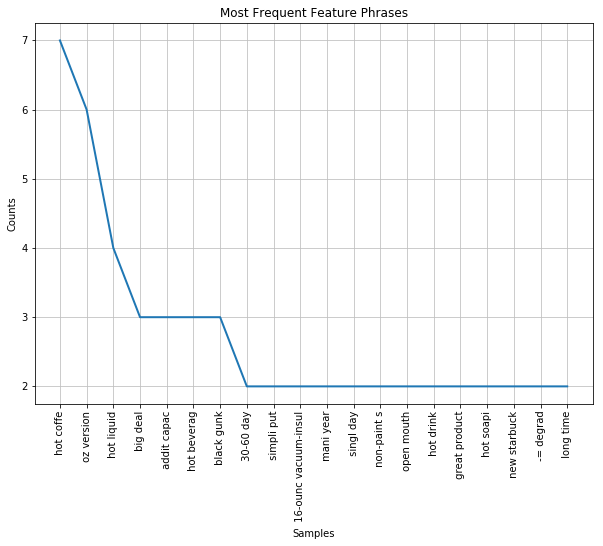

In [71]:
freqdist = nltk.FreqDist(word for word in extracted)
most_common = freqdist.most_common()
print(most_common[:20])
print(freqdist.max())
plt.figure(figsize=(10, 7))  # We want a bigger size plot
freqdist.plot(20, title = "Most Frequent Feature Phrases", cumulative = False)

In [72]:
freqdist.pprint(maxlen = 20)

FreqDist({' hot coffe': 7, ' oz version': 6, ' hot liquid': 4, ' big deal': 3, ' addit capac': 3, ' hot beverag': 3, ' black gunk': 3, ' 30-60 day': 2, ' simpli put': 2, ' 16-ounc vacuum-insul': 2, ' mani year': 2, ' singl day': 2, ' non-paint s': 2, ' open mouth': 2, ' hot drink': 2, ' great product': 2, ' hot soapi': 2, ' new starbuck': 2, ' -= degrad': 2, ' long time': 2, ...})


Most common positive and negative phrases

In [73]:
# Positive
freqdist_pos = nltk.FreqDist(word for word in extracted_pos)
most_common_pos = freqdist_pos.most_common()
print(most_common_pos[:10])
print(freqdist_pos.max())
freq_tab_pos = freqdist_pos.tabulate(6)

[(' simpli put', 2), (' 16-ounc vacuum-insul', 2), (' mani year', 2), (' oz version', 2), (' great product', 2), (' hot coffe', 2), (' hot water', 2), (' bad review', 1), (' singl use', 1), (' regular glass', 1)]
 simpli put
           simpli put  16-ounc vacuum-insul             mani year            oz version         great product             hot coffe 
                    2                     2                     2                     2                     2                     2 


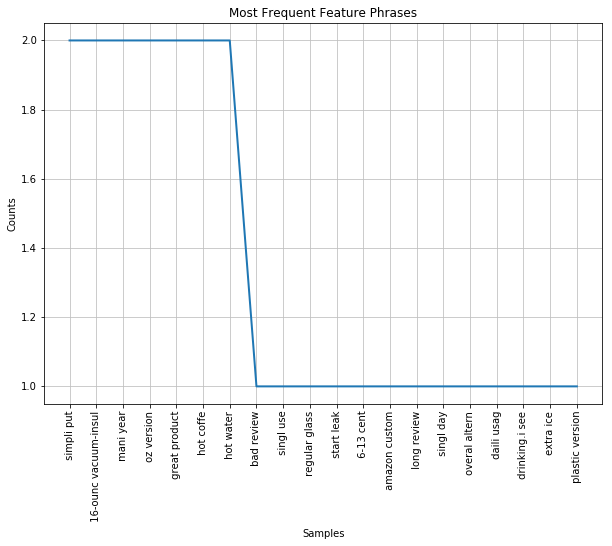

In [74]:
plt.figure(figsize=(10, 7))  # We want a bigger size plot
freqdist_pos.plot(20, title = "Most Frequent Feature Phrases", cumulative = False)

In [75]:
# Negative
freqdist_neg = nltk.FreqDist(word for word in extracted_neg)
most_common_neg = freqdist_neg.most_common()
print(most_common_neg[:10])
print(freqdist_neg.max())
freq_tab_neg = freqdist_neg.tabulate(6)

[(' hot coffe', 5), (' oz version', 4), (' big deal', 3), (' addit capac', 3), (' hot liquid', 3), (' 30-60 day', 2), (' non-paint s', 2), (' open mouth', 2), (' hot beverag', 2), (' hot drink', 2)]
 hot coffe
   hot coffe   oz version     big deal  addit capac   hot liquid    30-60 day 
           5            4            3            3            3            2 


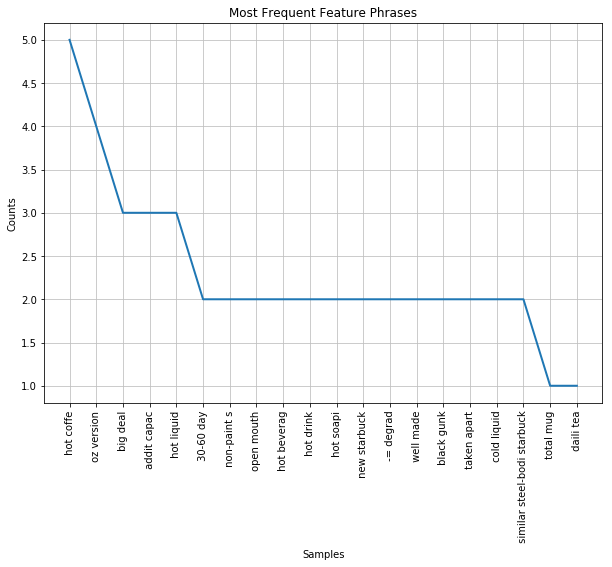

In [76]:
plt.figure(figsize=(10, 7))  # We want a bigger size plot
freqdist_neg.plot(20, title = "Most Frequent Feature Phrases", cumulative = False)

Unlemmatize and unstem using the dictionary created earlier

In [77]:
import inflect

In [78]:
p = inflect.engine()
def replacewords(mc):
    newmc=[]
    for a in tqdm(mc):
        newword="";found=False;
        for b in a[0].split():            
            for x in lem_word_mapping:
                #print(x)
                #print(b)
                if b==x:
                    found=True
                    sing=(lem_word_mapping[x] if p.singular_noun(lem_word_mapping[x])==False else p.singular_noun(lem_word_mapping[x]))
                    if newword=="":
                        newword = newword + sing
                    else:
                        newword = newword + " " +  sing
            if found==False:
                if newword=="":
                    newword = newword + b
                else:
                    newword = newword + " " +  b
                    #print(newword)
        newmc.append((newword,a[1]))
    return newmc

final = replacewords(most_common)
final_pos = replacewords(most_common_pos)
final_neg = replacewords(most_common_neg)

100%|██████████| 156/156 [00:00<00:00, 8715.90it/s]


In [79]:
print("Top Feature Phrases:")
print(final[0])
print(final[:50])
print("Top Positive Feature Phrases:")
print(final_pos[0])
print(final_pos[:50])
print("Top Negative Feature Phrases:")
print(final_neg[0])
print(final_neg[:50])

Top Feature Phrases:
('hot coffee', 7)
[('hot coffee', 7), ('oz version', 6), ('hot liquid', 4), ('big deal', 3), ('additional capacity', 3), ('hot beverage', 3), ('black gunk', 3), ('30-60 day', 2), ('simply', 2), ('16-ounce vacuum-insulated', 2), ('many year', 2), ('single day', 2), ('non-painted s', 2), ('opening', 2), ('hot drinking', 2), ('great production', 2), ('hot soapy', 2), ('new starbuck', 2), ('-= degraded', 2), ('long time', 2), ('well made', 2), ('taken apart', 2), ('cold liquid', 2), ('hot water', 2), ('similar steel-bodied starbuck', 2), ('total mug', 1), ('bad review', 1), ('daily', 1), ('single', 1), ('mug started', 1), ('regular glass', 1), ('started leaking', 1), ('replacement lidded', 1), ('new lidded', 1), ('new lids.ok', 1), ('big box', 1), ('total cost', 1), ('tax.the', 1), ('ever dealt', 1), ('6-13 cent', 1), ('expressed intention', 1), ('replacement mug', 1), ('amazon customer', 1), ('long review', 1), ('quite obviou', 1), ('single', 1), ('likely employee', 1

We'll find out the opinions corresponding to the most common features.
Its a simple search in a bunch of lists/files at this point

In [80]:
def featuresInContext(item_arr, opinion_phrases, sentence_arr ):
    for item,support in tqdm(sorted(item_arr, key=lambda item_support: item_support[1], reverse=True)):
        count = 0
        print("------" + "Item > " + item[0] + "------")
        for phrase, freq in sorted(opinion_phrases, key = lambda phrase_freq: phrase_freq[1], reverse = True):
            pcount = 0
            if normalise(item[0]) in normalise(phrase):
                count+=1
                print("---" + "Phrase > " + phrase + "----")
                for l in sentence_arr:
                    if normalise(phrase) in normalise(l):
                        # print("Debug: " + l)
                        for b in zip(l.split(" ")[:-1], l.split(" ")[1:]):
                            #print(b[0]+" "+b[1])
                            if normalise(b[0])==normalise(item[0]):
                                print("---" + "examplex" + "----")
                                print(l.replace("'","").replace("]","").replace("[",""))
                                pcount+=1
                                break
                            elif (normalise(b[0])+" "+normalise(b[1]))==normalise(item[0]):
                                print("---" + "exampley" + "----")
                                print(l.replace("'","").replace("]","").replace("[",""))
                                pcount+=1
                                break
                        if pcount==4:
                            break                
            if count==4:
                break 
        
# sent_str = ""
# sent_str = sent_str.join(sent_fullreview)
# token_sentences = sent_tokenizer1.tokenize(sent_str)
# featuresInContext(items, final, sent_fullreview)

In [81]:
def featuresInContextA(item_arr, opinion_phrases, sentence_arr ):
    for item,support in tqdm(sorted(item_arr, key=lambda item_support: item_support[1], reverse=True)):
        count = 0
        print("------" + "Item > " + item[0] + "------")
        for phrase, freq in sorted(opinion_phrases, key = lambda phrase_freq: phrase_freq[1], reverse = True):
            pcount = 0
            count+=1
            print("---" + "Phrase > " + str(count) + " >>> " + phrase + "----")
            for l in sentence_arr:
                if (normalise(phrase) in normalise(l)) and (normalise(item[0]) in normalise(l)):
                    pcount+=1
                    print("---" + "example > " + str(pcount) + " >>> " + "----")
                    print(l)
                    if pcount==4:
                        break                
            if count==4:
                break 
        
              

In [82]:
def featuresInContextB(item_arr, opinion_phrases, sentence_arr ):
    # Count of the phrases
    count = 0
    # Latest time in a string
    timestr = time.strftime("%Y%m%d-%H%M%S")
    # Outputfile
    print("File created at: " + timestr)
    output_file_name = "o_" + timestr + ".txt"
    f= open(output_file_name,"a+")
    # Go through the phrases and print sentences that contain them
    for phrase, freq in sorted(opinion_phrases, key = lambda phrase_freq: phrase_freq[1], reverse = True):
        # Count of the number of sentences
        pcount = 0
        count+=1
        f.write("\r\n")
        f.write("---" + "Phrase > " + str(count) + " >>> " + phrase + "----\r\n\r\n")
        for l in sentence_arr:
            if normalise(phrase) in normalise(l):
                pcount+=1
                f.write("---" + "example > " + str(pcount) + " >>> " + "----\r\n")
                f.write("%s\r\n" %(l))
                if pcount==5:
                    break                
        if count==5:
            break 
    f.close()

Modified to function without the item. Its assumed that the reviews are already constrained by the item in this case

In [83]:
def featuresInContextC(opinion_phrases, sentence_arr ):
    count = 0
    for phrase, freq in sorted(opinion_phrases, key = lambda phrase_freq: phrase_freq[1], reverse = True):
        pcount = 0
        count +=1
        print("---" + "Phrase > " + str(count) + " >>> " + phrase + "----")
        for l in sentence_arr:            
            if normalise(phrase) in normalise(l):
                pcount +=1
                print("---" + "example > " + str(pcount) + " >>> " + "----")
                print(l)
                
                if pcount == 4:
                    break
        if count == 4:
            break
              

In [84]:
# Extract sentences with features
from collections import defaultdict
def featuresAndContextOld(item_arr, opinion_phrases, sentence_arr, phrase_count, sentence_count ):
    """ Extract sentences with features/opinion_phrases
    item_arr is to constrain the context to items under study
    Output is extracted into a file
    Output is also return as a JSON string
    """


    # Latest time in a string
    timestr = time.strftime("%Y%m%d-%H%M%S")

    # Outputfile
    print("File created at: " + timestr)
    output_file_name = "o_" + timestr + ".txt"
    output_json_name = "o_" + timestr + ".json"

    f= open(output_file_name,"a+")

    # Output JSON
    outDict = defaultdict(list)
    outJSON = ''

    p_count = 0
    # Go through the phrases and print sentences that contain them
    for phrase, freq in sorted(opinion_phrases, key = lambda phrase_freq: phrase_freq[1], reverse = True):

        f.write("\r\n")
        f.write("---" + "Phrase > " + str(p_count) + " >>> " + phrase + "----\r\n\r\n")
        p_count += 1
        s_count = 0
        for l in sentence_arr:
            if normalise(phrase) in normalise(l):
                f.write("---" + "example > " + str(s_count) + " >>> " + "----\r\n")
                f.write("%s\r\n" %(l))
                outDict[phrase].append(l)
                s_count += 1
                if s_count == sentence_count:
                    break
        if p_count == phrase_count:
            break
    outJSON = json.dumps(outDict, sort_keys = True, indent = 4)
    with open(output_json_name, 'w') as jf:
        json.dump(outDict, jf, sort_keys = True, indent=4)

    f.close()
    return output_file_name, output_json_name, outJSON


In [85]:
def featuresAndContext(item_arr, opinion_phrases, sentence_arr, phrase_count, sentence_count ):
    """ Extract sentences with features/opinion_phrases
    item_arr is to constrain the context to items under study
    Output is returned as a JSON string
    """

    # Output JSON
    outDict = defaultdict(list)
    outJSON = ''

    p_count = 0
    # Go through the phrases and print sentences that contain them
    for phrase, freq in sorted(opinion_phrases, key = lambda phrase_freq: phrase_freq[1], reverse = True):

        # f.write("\r\n")
        # f.write("---" + "Phrase > " + str(p_count) + " >>> " + phrase + "----\r\n\r\n")
        p_count += 1
        s_count = 0
        for l in sentence_arr:
            if normalise(phrase) in normalise(l):
                # f.write("---" + "example > " + str(s_count) + " >>> " + "----\r\n")
                # f.write("%s\r\n" %(l))
                outDict[phrase].append(l)
                s_count += 1
                if s_count == sentence_count:
                    break
        if p_count == phrase_count:
            break
    outJSON = json.dumps(outDict, sort_keys = True, indent = 4)
    # with open(output_json_name, 'w') as jf:
        # json.dump(outDict, jf, sort_keys = True, indent=4)

    # f.close()
    return outJSON

In [86]:
print(items)

[(('lid',), 0.12871287128712872), (('mug',), 0.22772277227722773), (('contigo',), 0.11386138613861387), (('coffe',), 0.13366336633663367)]


Sort by support

In [87]:
items.sort(key=lambda tup: tup[1], reverse=True) 

In [88]:
print(items)

[(('mug',), 0.22772277227722773), (('coffe',), 0.13366336633663367), (('lid',), 0.12871287128712872), (('contigo',), 0.11386138613861387)]


In [89]:
# featuresInContextB(items, final_pos, sent_pos_review)

In [90]:
# featuresInContextB(items, final_neg, sent_neg_review)

In [91]:
# Latest time in a string
timestr = time.strftime("%Y%m%d-%H%M%S")
# Outputfile
print("Files created at: " + timestr)
output_file_pos = "o_" + "pos_" + timestr + ".json"
output_file_neg = "o_" + "neg_" + timestr + ".json"

Files created at: 20190713-175900


In [92]:
# featuresAndContext(item_arr, opinion_phrases, sentence_arr, phrase_count, sentence_count )
    # Getting sentences with the positive phrases
out_json_s_pos = featuresAndContext(items, final_pos, sent_pos_review, 10, 10)
with open(output_file_pos, 'w') as jf:
    jf.write(out_json_s_pos)
print("Pos phrases written to: " + output_file_pos)

Pos phrases written to: o_pos_20190713-175900.json


In [93]:
# Getting sentences with the negative phrases
out_json_s_neg = featuresAndContext(items, final_neg, sent_neg_review, 10, 10)
with open(output_file_neg, 'w') as jfn:
    jfn.write(out_json_s_neg)
print("Neg phrases written to: " + output_file_neg)

Neg phrases written to: o_neg_20190713-175900.json
